In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
diabetes = pd.read_csv("D:/Users/moham/Downloads/diabetes.csv")

In [30]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
non_diabetic = diabetes[diabetes['Outcome']==0]

In [32]:
diabetic = diabetes[diabetes['Outcome']==1]

In [33]:
print( 'diabetic individuals percentage =', (len(diabetic) / len(diabetes) )*100,"%")

diabetic individuals percentage = 34.89583333333333 %


In [34]:
column_headers = diabetes.columns.values

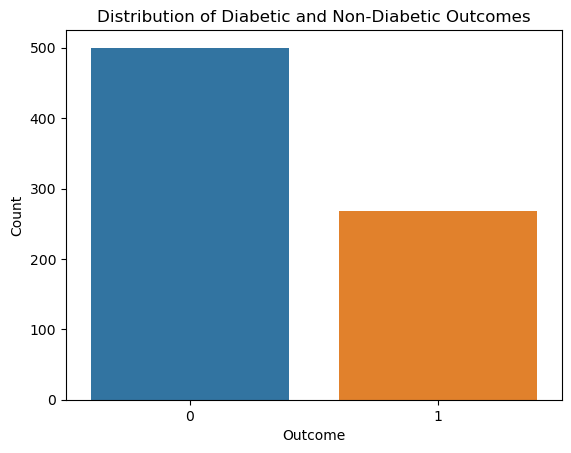

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the Outcome variable
sns.countplot(data=diabetes, x='Outcome')
plt.title('Distribution of Diabetic and Non-Diabetic Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

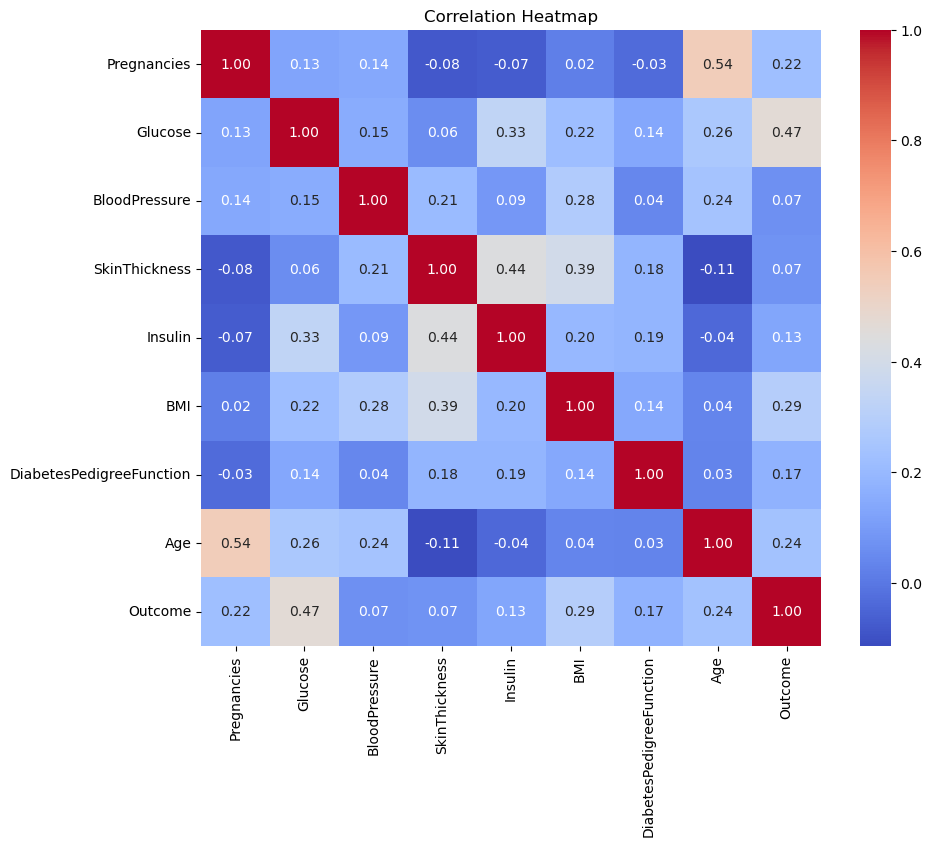

In [36]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

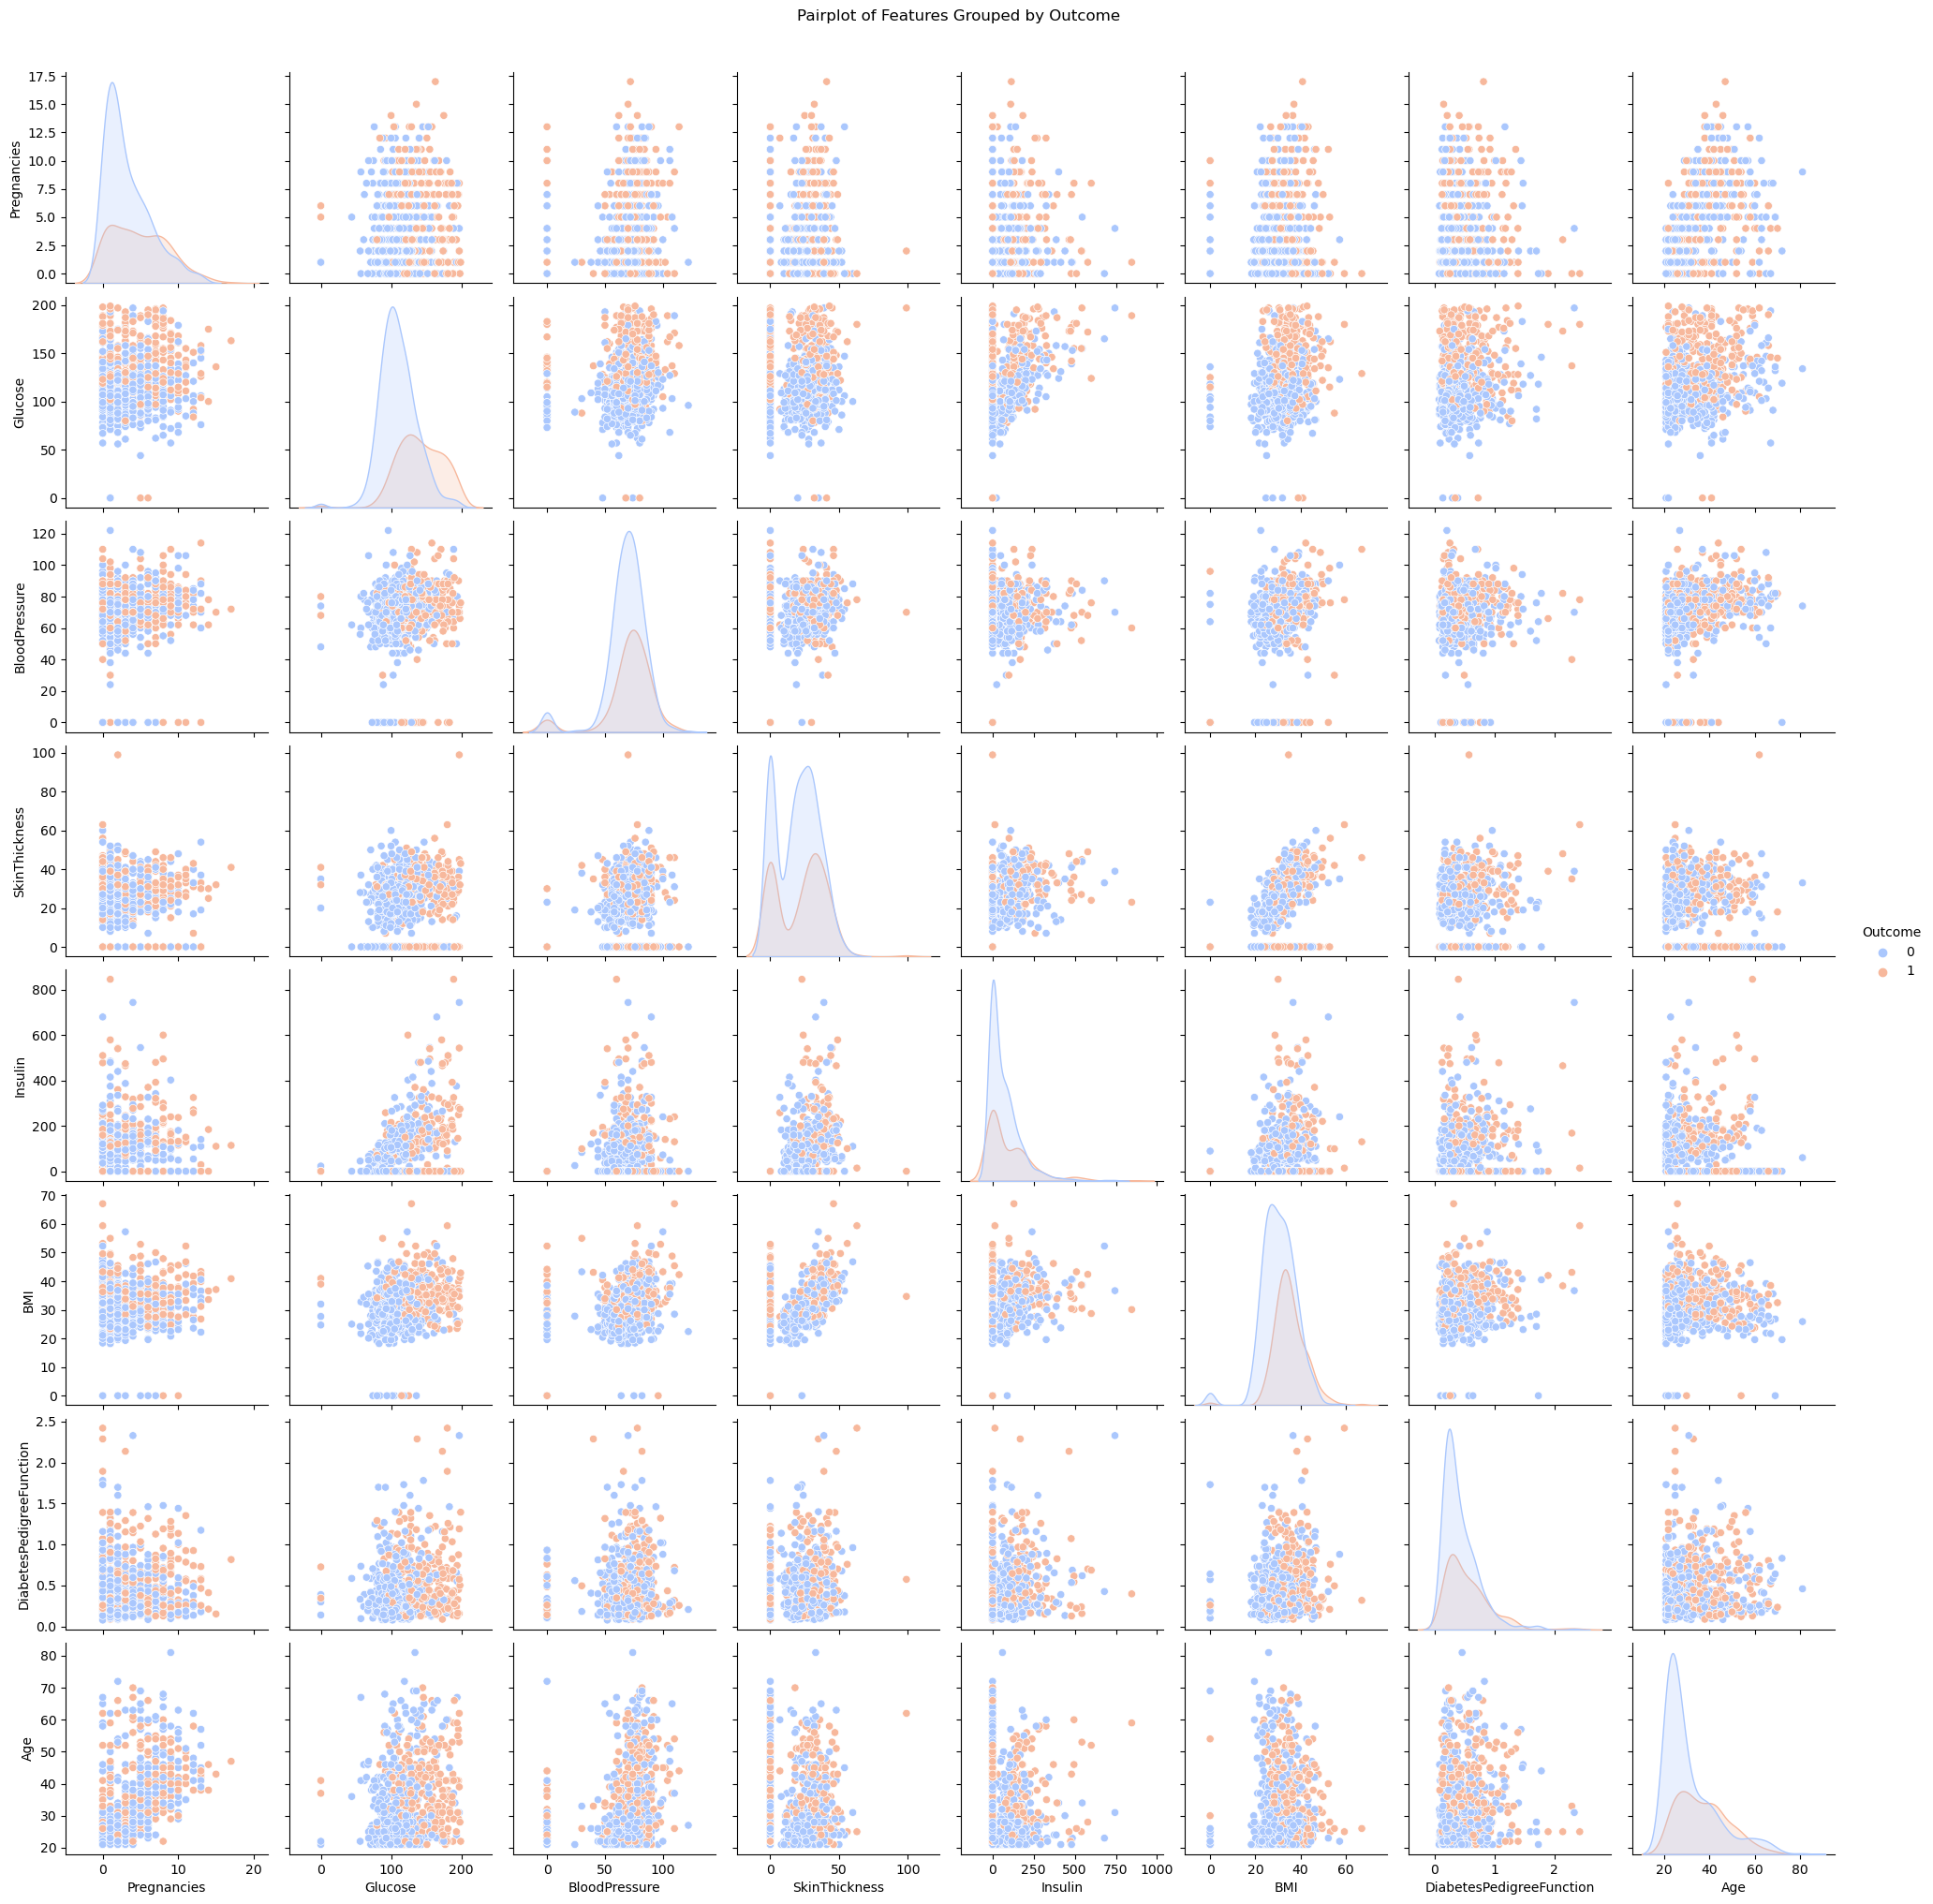

In [37]:
# Pairplot of numerical features
sns.pairplot(diabetes, hue='Outcome', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Features Grouped by Outcome', y=1.02)
plt.show()

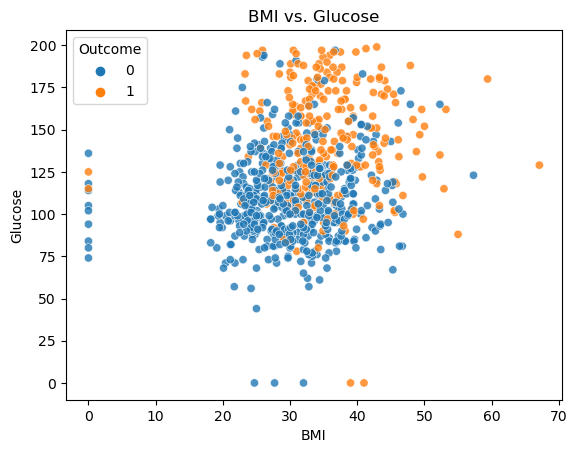

In [38]:
# Scatter plot of BMI vs Glucose colored by Outcome
sns.scatterplot(data=diabetes, x='BMI', y='Glucose', hue='Outcome', alpha=0.8)
plt.title('BMI vs. Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()

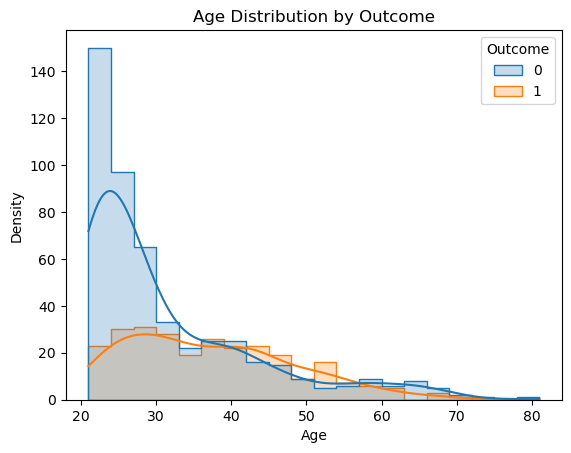

In [39]:
# Age distribution for each outcome
sns.histplot(data=diabetes, x='Age', hue='Outcome', kde=True, element='step', bins=20)
plt.title('Age Distribution by Outcome')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

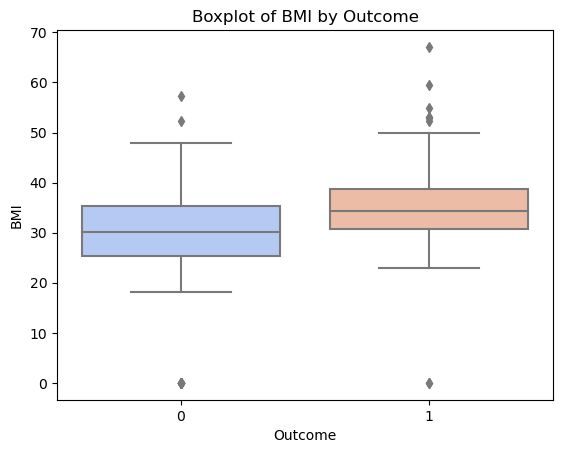

In [40]:
# Boxplot of BMI by Outcome
sns.boxplot(data=diabetes, x='Outcome', y='BMI', palette='coolwarm')
plt.title('Boxplot of BMI by Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

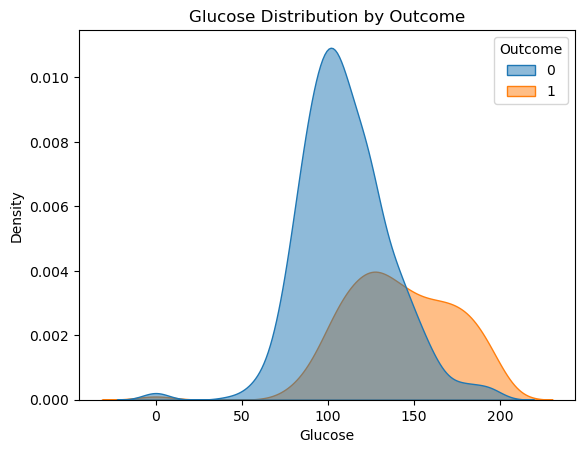

In [41]:
# Glucose distribution for each outcome
sns.kdeplot(data=diabetes, x='Glucose', hue='Outcome', fill=True, alpha=0.5)
plt.title('Glucose Distribution by Outcome')
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.show()

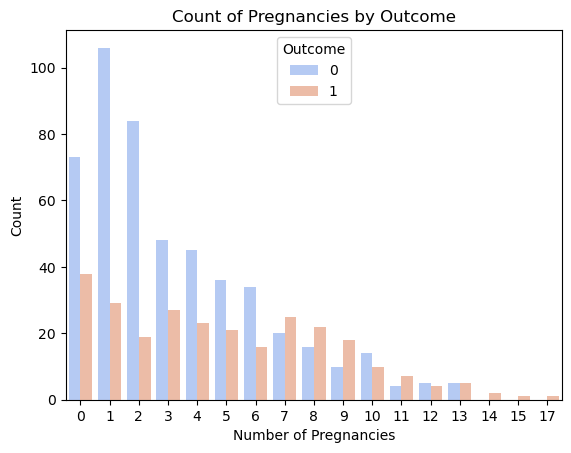

In [42]:
# Countplot of Pregnancies by Outcome
sns.countplot(data=diabetes, x='Pregnancies', hue='Outcome', palette='coolwarm')
plt.title('Count of Pregnancies by Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.show()

### Data Modeling and Cleaning

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [79]:
# Replace zero values in selected columns with the median
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    median = diabetes[col][diabetes[col] != 0].median()
    diabetes[col] = diabetes[col].replace(0, median)


# Feature engineering: Categorization and interaction terms
diabetes['AgeGroup'] = pd.cut(diabetes['Age'], bins=[20, 30, 40, 50, 60, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-80'])
diabetes['BMI_Category'] = pd.cut(diabetes['BMI'], bins=[0, 18.5, 25, 30, 40, 70], labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese'])
diabetes['Glucose_BMI'] = diabetes['Glucose'] * diabetes['BMI']
diabetes['Age_Pedigree'] = diabetes['Age'] * diabetes['DiabetesPedigreeFunction']

# Drop low-correlation features
data_cleaned = diabetes.drop(['BloodPressure', 'SkinThickness', 'Insulin'], axis=1)

# Encode categorical features
data_cleaned = pd.get_dummies(data_cleaned, columns=['AgeGroup', 'BMI_Category'], drop_first=True)

In [45]:
# Separate features and target variable
X = data_cleaned.drop('Outcome', axis=1)
y = data_cleaned['Outcome']

# Inspect feature names and ensure compatibility
print("Shape of X before scaling:", X.shape)
feature_names = X.columns.tolist()

Shape of X before scaling: (768, 15)


In [80]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42, stratify=y)

In [82]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [83]:
rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=None,
    max_features='log2',
    min_samples_split=5,
    n_estimators=200
)
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(max_features='log2', min_samples_split=5,
                       n_estimators=200, random_state=42)

In [84]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],       # Number of features to consider for split
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
}

# Initialize the base Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_balanced, y_train_balanced)


# Extract the best model
best_rf_model = grid_search.best_estimator_

# Display the best parameters
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

# Display the best Random Forest model
print("\nBest Random Forest Model:")
print(best_rf_model)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters from Grid Search:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Best Random Forest Model:
RandomForestClassifier(n_estimators=300, random_state=42)


In [89]:
probabilities = classifier.predict_proba(scaled_input_data)
threshold = 0.5  # Adjust as needed
prediction = 1 if probabilities[0][1] >= threshold else 0
print("Adjusted Prediction:", prediction)

Adjusted Prediction: 0


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[116  34]
 [ 20  61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       150
           1       0.64      0.75      0.69        81

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.78      0.77      0.77       231



In [52]:
# Feature importance from the best Random Forest model
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance)

Feature Importances:
                        Feature  Importance
5                   Glucose_BMI    0.216594
1                       Glucose    0.178771
2                           BMI    0.121123
4                           Age    0.112911
6                  Age_Pedigree    0.107395
3      DiabetesPedigreeFunction    0.087877
0                   Pregnancies    0.082764
8                AgeGroup_40-50    0.020647
11          BMI_Category_Normal    0.013157
14  BMI_Category_Severely Obese    0.012093
13           BMI_Category_Obese    0.011446
7                AgeGroup_30-40    0.011146
12      BMI_Category_Overweight    0.010785
9                AgeGroup_50-60    0.008045
10               AgeGroup_60-80    0.005247


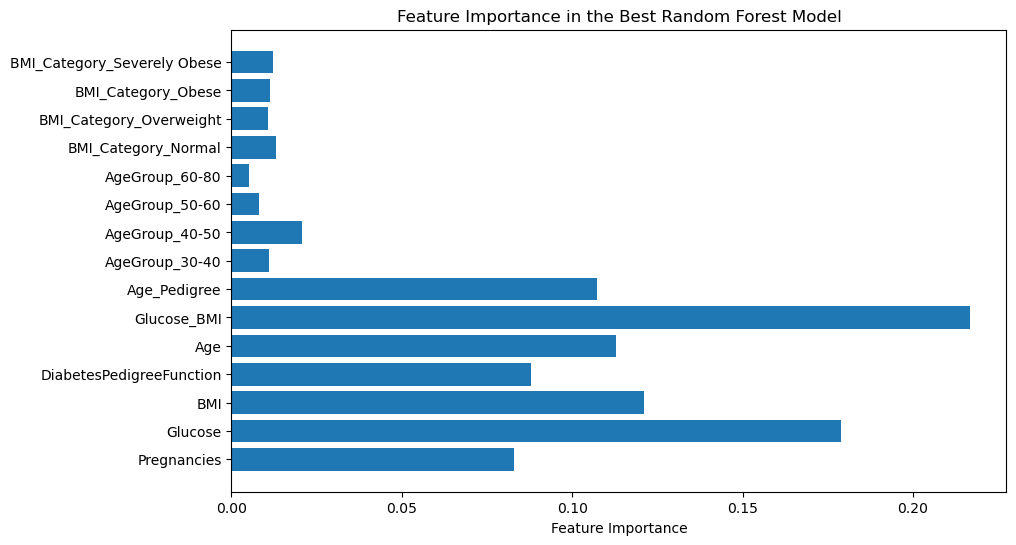

In [53]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = best_rf_model.feature_importances_
features = X_train.columns  # Adjust if X_train is scaled and columns are not present

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in the Best Random Forest Model')
plt.show()

In [92]:
import pickle

# Save the best model
with open('diabetes_best1.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

print("Tuned Random Forest model saved as 'best_rf_model.pkl'.")

Tuned Random Forest model saved as 'best_rf_model.pkl'.


In [94]:
import pickle

# Load the trained model (adjust the path to your actual file location)
with open('diabetes_best1.pkl', 'rb') as file:
    classifier = pickle.load(file)

print(type(classifier))  # Verify that the model loads correctly


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [95]:
# Load the trained model
import pickle

with open('diabetes_best1.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Check the feature names the model was trained on
trained_feature_names = classifier.feature_names_in_
print("Feature names used during training:", trained_feature_names)

# Check the feature names in your current dataset
current_feature_names = list(X.columns)  # Replace X with the feature DataFrame you are using
print("Feature names in current dataset:", current_feature_names)

# Compare the two sets of feature names
missing_features = set(trained_feature_names) - set(current_feature_names)
extra_features = set(current_feature_names) - set(trained_feature_names)

print("\nMissing features:", missing_features)
print("Extra features:", extra_features)


Feature names used during training: ['Pregnancies' 'Glucose' 'BMI' 'DiabetesPedigreeFunction' 'Age'
 'Glucose_BMI' 'Age_Pedigree' 'AgeGroup_30-40' 'AgeGroup_40-50'
 'AgeGroup_50-60' 'AgeGroup_60-80' 'BMI_Category_Normal'
 'BMI_Category_Overweight' 'BMI_Category_Obese'
 'BMI_Category_Severely Obese']
Feature names in current dataset: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_BMI', 'Age_Pedigree', 'AgeGroup_30-40', 'AgeGroup_40-50', 'AgeGroup_50-60', 'AgeGroup_60-80', 'BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese', 'BMI_Category_Severely Obese']

Missing features: set()
Extra features: set()


In [96]:
import pickle

# Save model
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

# Save scaler
with open('diabetes_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)